In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
datapath = './figdata'
savepath = './figures'

with xr.open_dataset(datapath+'/CESM2.TREFHT.nc') as ds:
    trefht = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.PRECT.nc') as ds:
    prect = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.T_p19.nc') as ds:
    t = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.U_p19.nc') as ds:
    u = {k:ds[k] for k in ds.data_vars}

with xr.open_dataset(datapath+'/CESM2.TREFHTstd.nc') as ds:
    trefht_std = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.PRECTstd.nc') as ds:
    prect_std = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.T_p19std.nc') as ds:
    t_std = {k:ds[k] for k in ds.data_vars}
with xr.open_dataset(datapath+'/CESM2.U_p19std.nc') as ds:
    u_std = {k:ds[k] for k in ds.data_vars}

In [3]:
exps = [exp for exp in trefht if (('JJA' not in exp) and ('DJF' not in exp))]
exps

['C_ref', 'C_cnt', 'C_20', 'W_ref', 'W_cnt', 'W_20']

In [4]:
exps_diff = [
    ['C_cnt','C_ref'],
    ['C_20','C_ref'],
    ['C_20','C_cnt'],
    ['W_cnt','W_ref'],
    ['W_20','W_ref'],
    ['W_20','W_cnt']
]

## 2m temperature

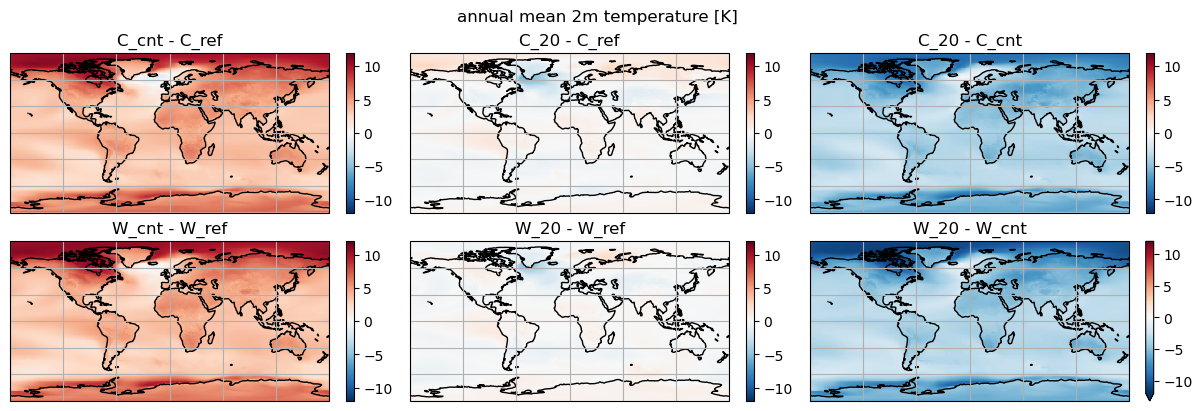

In [5]:
var = trefht

fig, axs = plt.subplots(2,3, figsize=(12,4), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle("annual mean 2m temperature [K]")
for exp,ax in zip(exps_diff,axs.flat):
    (var[exp[0]]-var[exp[1]]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-12, vmax=12, cmap='RdBu_r')
    ax.set_title(f'{exp[0]} - {exp[1]}')
    ax.coastlines()
    ax.gridlines()

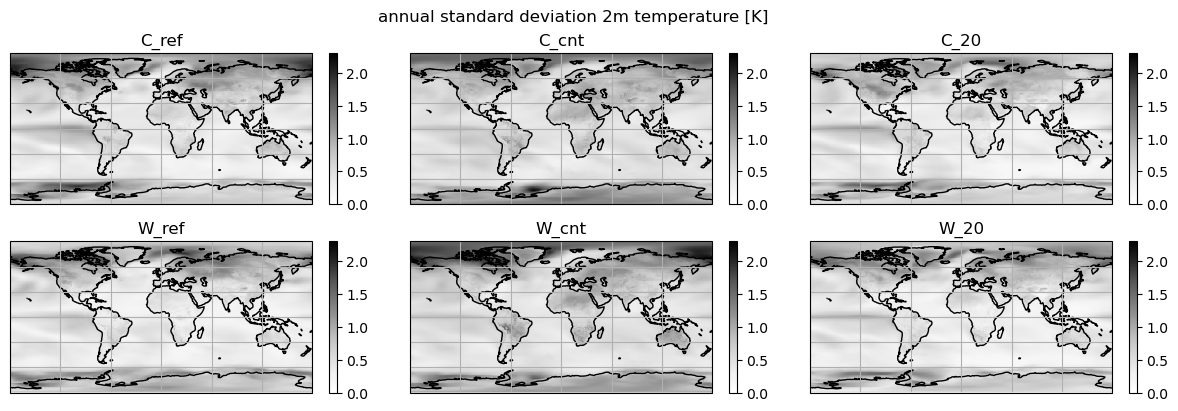

In [6]:
var = trefht_std

fig, axs = plt.subplots(2,3, figsize=(12,4), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle("annual standard deviation 2m temperature [K]")
for exp,ax in zip(exps,axs.flat):
    (var[exp]).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Greys', vmin=0, vmax=2.3, cbar_kwargs={'label':''})
    ax.set_title(exp)
    ax.coastlines()
    ax.gridlines()

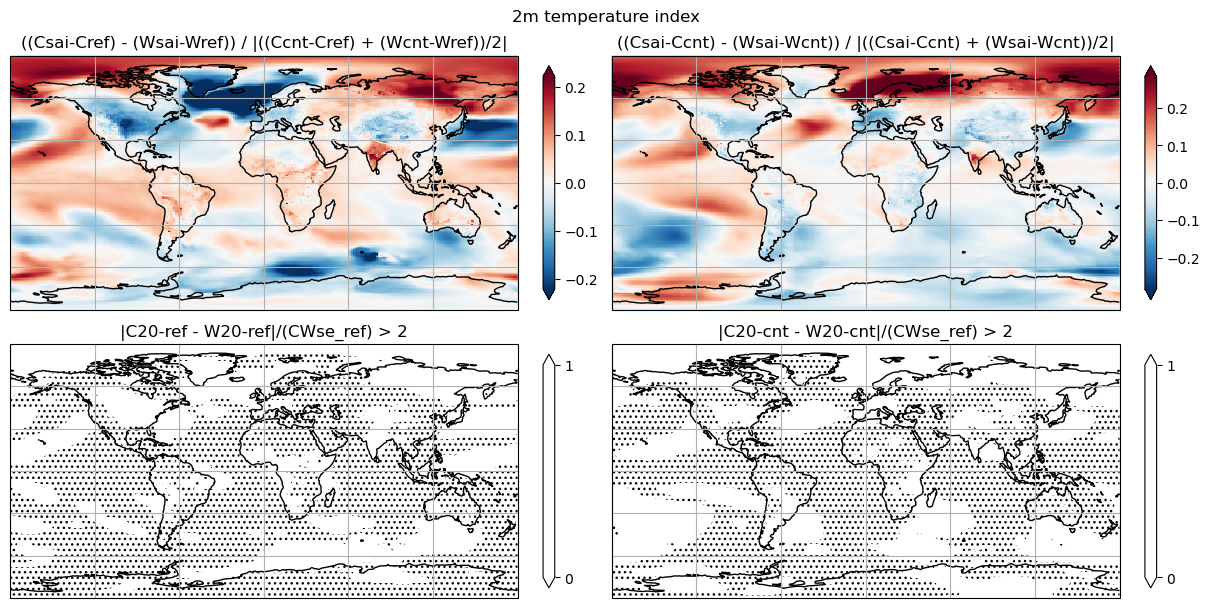

In [27]:
var = trefht
std = trefht_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

fig, axs = plt.subplots(2,2,subplot_kw={'projection':ccrs.PlateCarree()}, layout='constrained', figsize=(12,6))
fig.suptitle("2m temperature index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(np.abs(CWmean_cnt-CWmean_ref))).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("((Csai-Cref) - (Wsai-Wref)) / |((Ccnt-Cref) + (Wcnt-Wref))/2|")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(np.abs(CWmean_20-CWmean_cnt))).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("((Csai-Ccnt) - (Wsai-Wcnt)) / |((Csai-Ccnt) + (Wsai-Wcnt))/2|")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.coastlines()
    ax.gridlines()


CAM-WACCM model mean global mean:
3.970 (CNT-REF)
-4.012 (SAI-CNT)


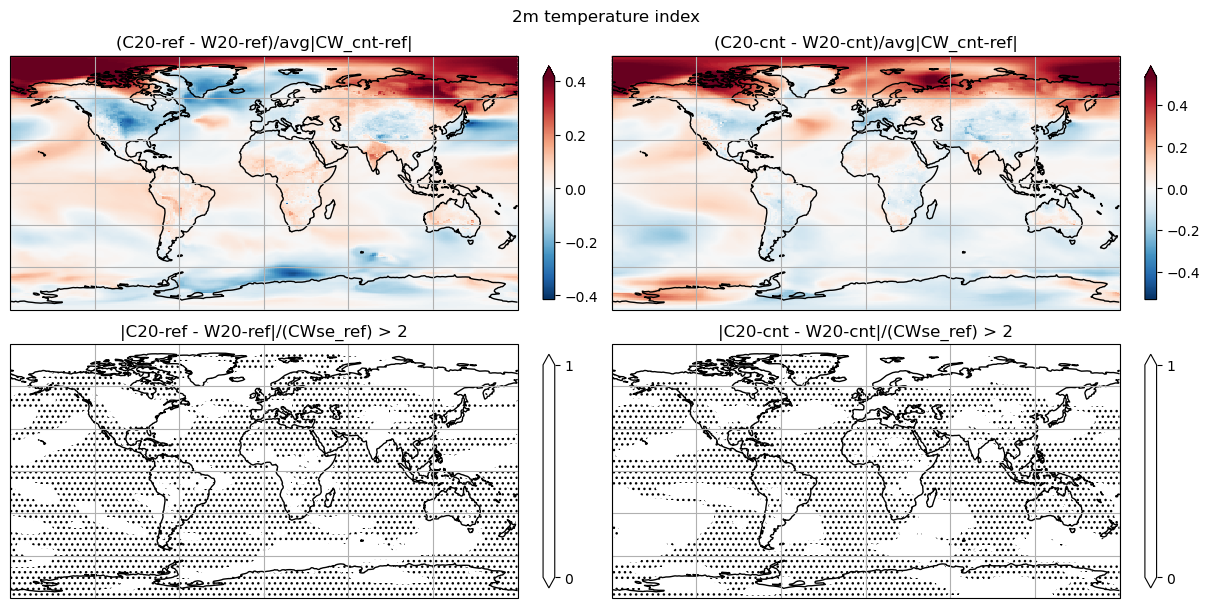

In [8]:
var = trefht
std = trefht_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

Ncntref = (CWmean_cnt - CWmean_ref).weighted(np.cos(np.deg2rad(CWmean_cnt.lat))).mean()
N20cnt = (CWmean_20 - CWmean_cnt).weighted(np.cos(np.deg2rad(CWmean_cnt.lat))).mean()
print(f"CAM-WACCM model mean global mean:\n{Ncntref:.3f} (CNT-REF)\n{N20cnt:.3f} (SAI-CNT)")

fig, axs = plt.subplots(2,2,subplot_kw={'projection':ccrs.PlateCarree()}, layout='constrained', figsize=(12,6))
fig.suptitle("2m temperature index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(np.abs(Ncntref))).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/avg|CW_cnt-ref|")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(np.abs(N20cnt))).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/avg|CW_cnt-ref|")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.coastlines()
    ax.gridlines()

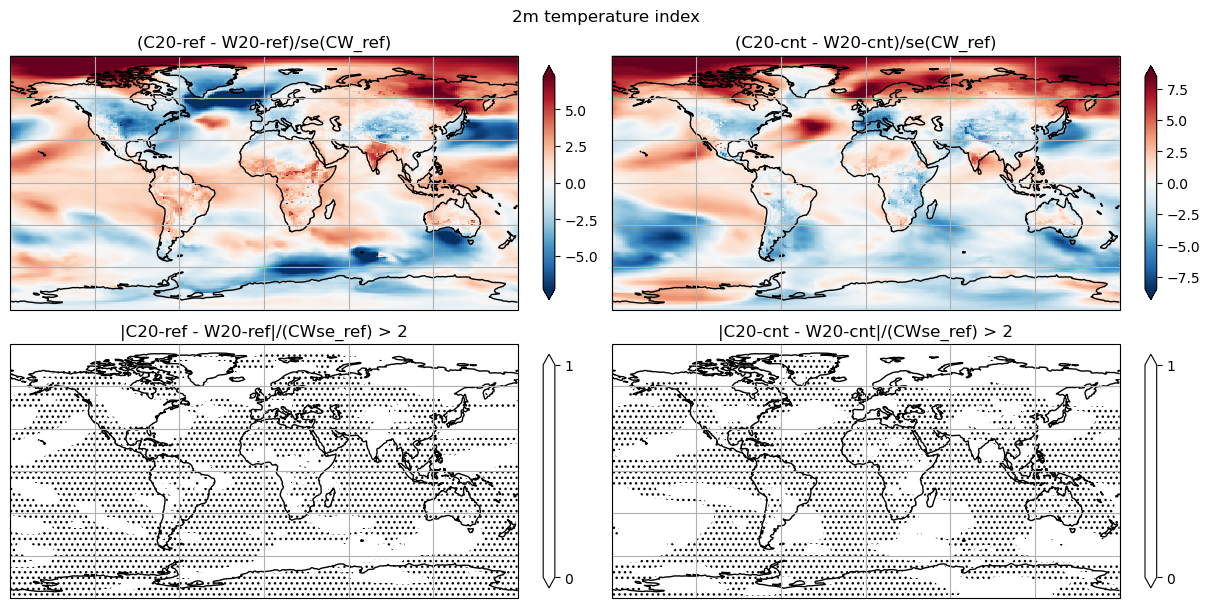

In [9]:
var = trefht
std = trefht_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

fig, axs = plt.subplots(2,2,subplot_kw={'projection':ccrs.PlateCarree()}, layout='constrained', figsize=(12,6))
fig.suptitle("2m temperature index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref)).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/se(CW_ref)")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref)).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/se(CW_ref)")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.coastlines()
    ax.gridlines()

## precipitation

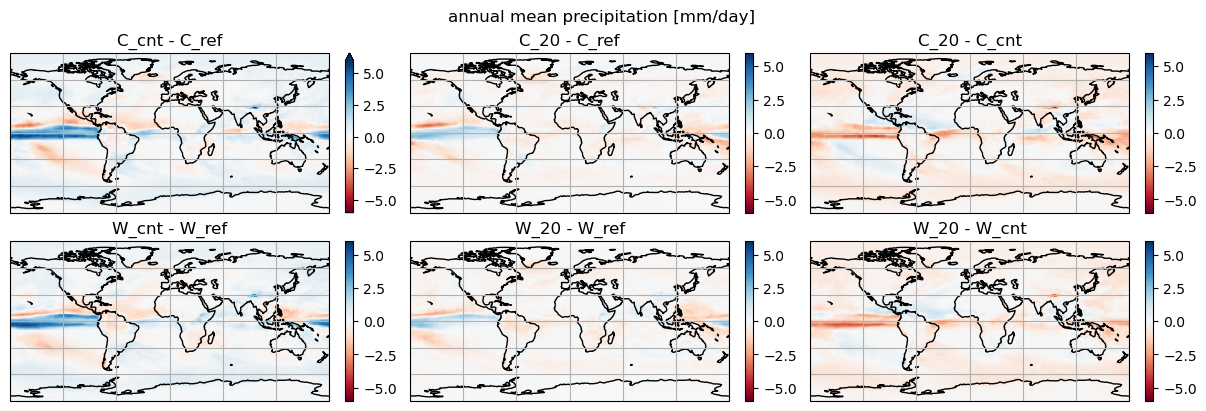

In [10]:
var = prect

fig, axs = plt.subplots(2,3, figsize=(12,4), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle("annual mean precipitation [mm/day]")

for exp,ax in zip(exps_diff,axs.flat):
    (var[exp[0]]-var[exp[1]]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-6, vmax=6, cmap='RdBu')
    ax.set_title(f'{exp[0]} - {exp[1]}')
    ax.coastlines()
    ax.gridlines()

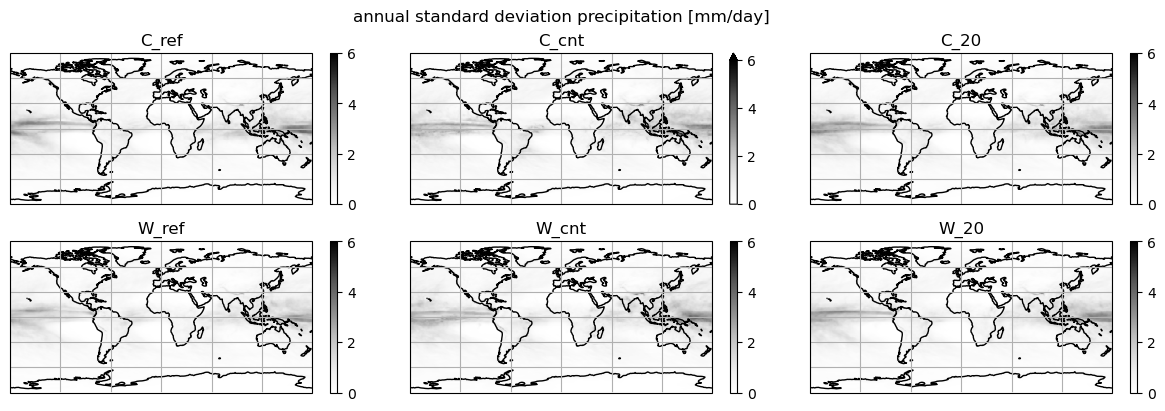

In [11]:
var = prect_std

fig, axs = plt.subplots(2,3, figsize=(12,4), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle("annual standard deviation precipitation [mm/day]")
for exp,ax in zip(exps,axs.flat):
    (var[exp]).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Greys', vmin=0, vmax=6, cbar_kwargs={'label':''})
    ax.set_title(exp)
    ax.coastlines()
    ax.gridlines()

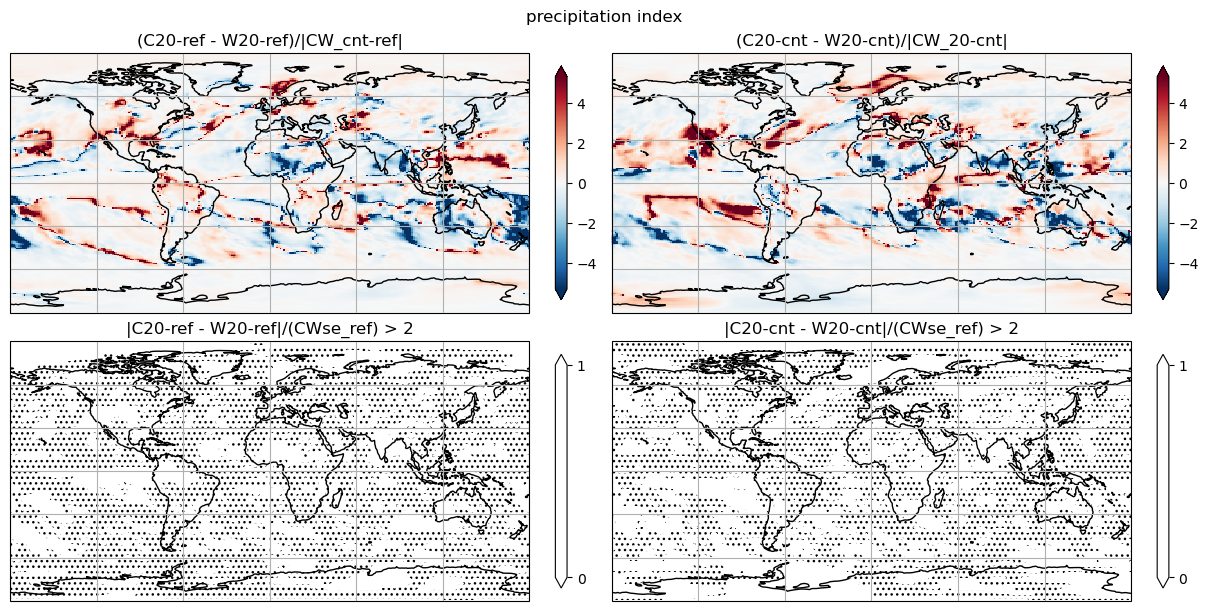

In [12]:
var = prect
std = prect_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

fig, axs = plt.subplots(2,2,subplot_kw={'projection':ccrs.PlateCarree()}, layout='constrained', figsize=(12,6))
fig.suptitle("precipitation index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/np.abs(CWmean_cnt-CWmean_ref)).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/|CW_cnt-ref|")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/np.abs(CWmean_20-CWmean_cnt)).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/|CW_20-cnt|")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.coastlines()
    ax.gridlines()

CAM-WACCM model mean global mean:
0.201 (CNT-REF)
-0.304 (SAI-CNT)


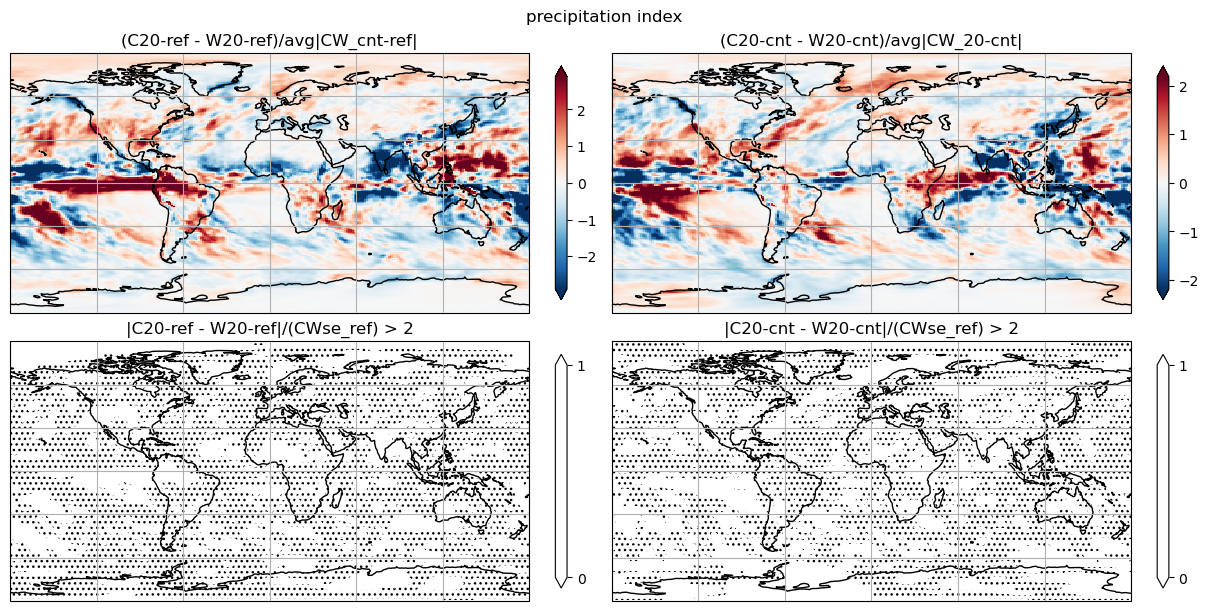

In [13]:
var = prect
std = prect_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

Ncntref = (CWmean_cnt - CWmean_ref).weighted(np.cos(np.deg2rad(CWmean_cnt.lat))).mean()
N20cnt = (CWmean_20 - CWmean_cnt).weighted(np.cos(np.deg2rad(CWmean_cnt.lat))).mean()
print(f"CAM-WACCM model mean global mean:\n{Ncntref:.3f} (CNT-REF)\n{N20cnt:.3f} (SAI-CNT)")

fig, axs = plt.subplots(2,2,subplot_kw={'projection':ccrs.PlateCarree()}, layout='constrained', figsize=(12,6))
fig.suptitle("precipitation index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/np.abs(Ncntref)).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/avg|CW_cnt-ref|")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/np.abs(N20cnt)).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/avg|CW_20-cnt|")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.coastlines()
    ax.gridlines()

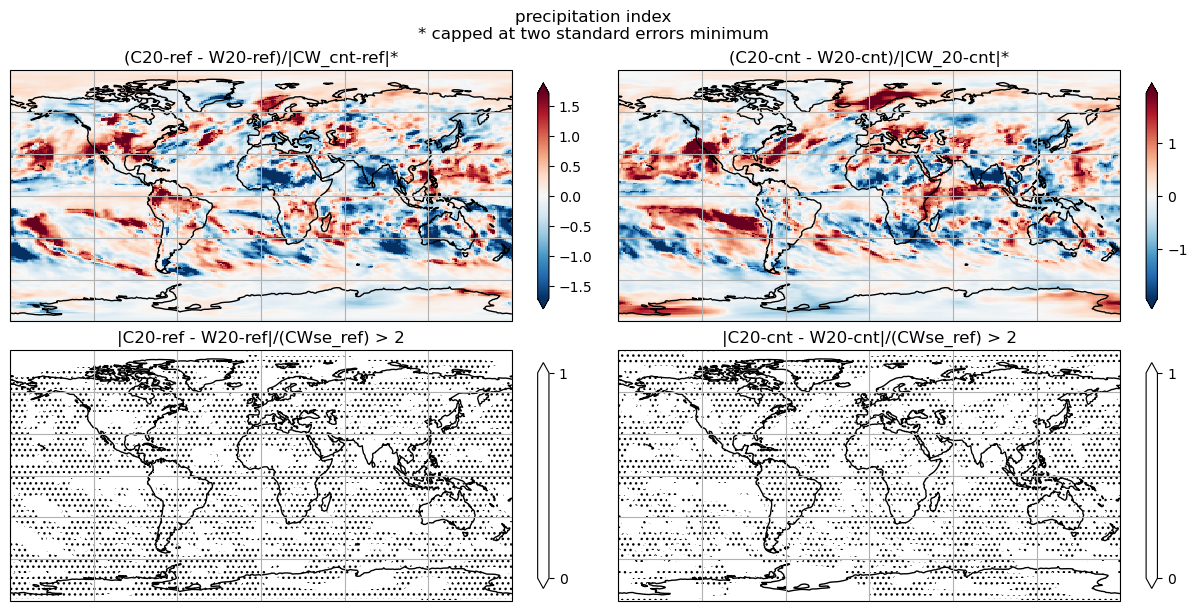

In [14]:
var = prect
std = prect_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

CWcntref = np.abs(CWmean_cnt-CWmean_ref)
CWcntrefcap = CWcntref.where(CWcntref>CWmeanse_ref, 2*CWmeanse_ref)
CW20cnt = np.abs(CWmean_20-CWmean_cnt)
CW20cntcap = CW20cnt.where(CW20cnt>CWmeanse_ref, 2*CWmeanse_ref)

fig, axs = plt.subplots(2,2,subplot_kw={'projection':ccrs.PlateCarree()}, layout='constrained', figsize=(12,6))
fig.suptitle("precipitation index\n* capped at two standard errors minimum")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/CWcntrefcap).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/|CW_cnt-ref|*")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/CW20cntcap).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/|CW_20-cnt|*")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.coastlines()
    ax.gridlines()

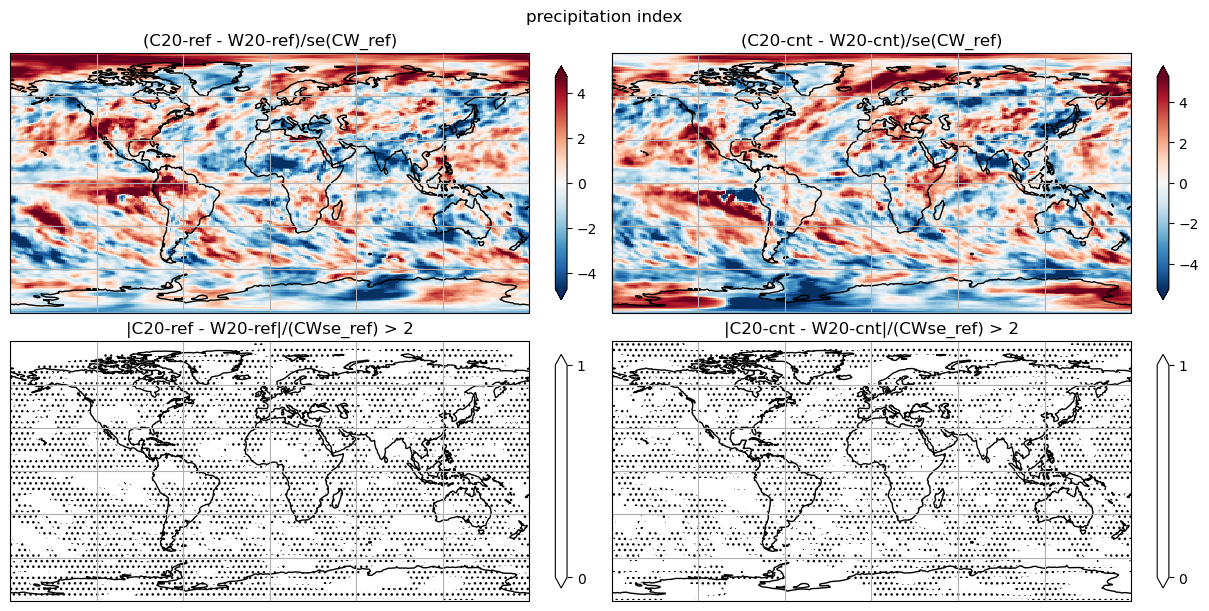

In [15]:
var = prect
std = prect_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

CWcntref = np.abs(CWmean_cnt-CWmean_ref)
CWcntrefcap = CWcntref.where(CWcntref>CWmeanse_ref, 2*CWmeanse_ref)
CW20cnt = np.abs(CWmean_20-CWmean_cnt)
CW20cntcap = CW20cnt.where(CW20cnt>CWmeanse_ref, 2*CWmeanse_ref)

fig, axs = plt.subplots(2,2,subplot_kw={'projection':ccrs.PlateCarree()}, layout='constrained', figsize=(12,6))
fig.suptitle("precipitation index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/CWmeanse_ref).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/se(CW_ref)")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/CWmeanse_ref).plot(ax=ax, transform=ccrs.PlateCarree(), robust=True, cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/se(CW_ref)")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.coastlines()
    ax.gridlines()

## zonal mean temperature

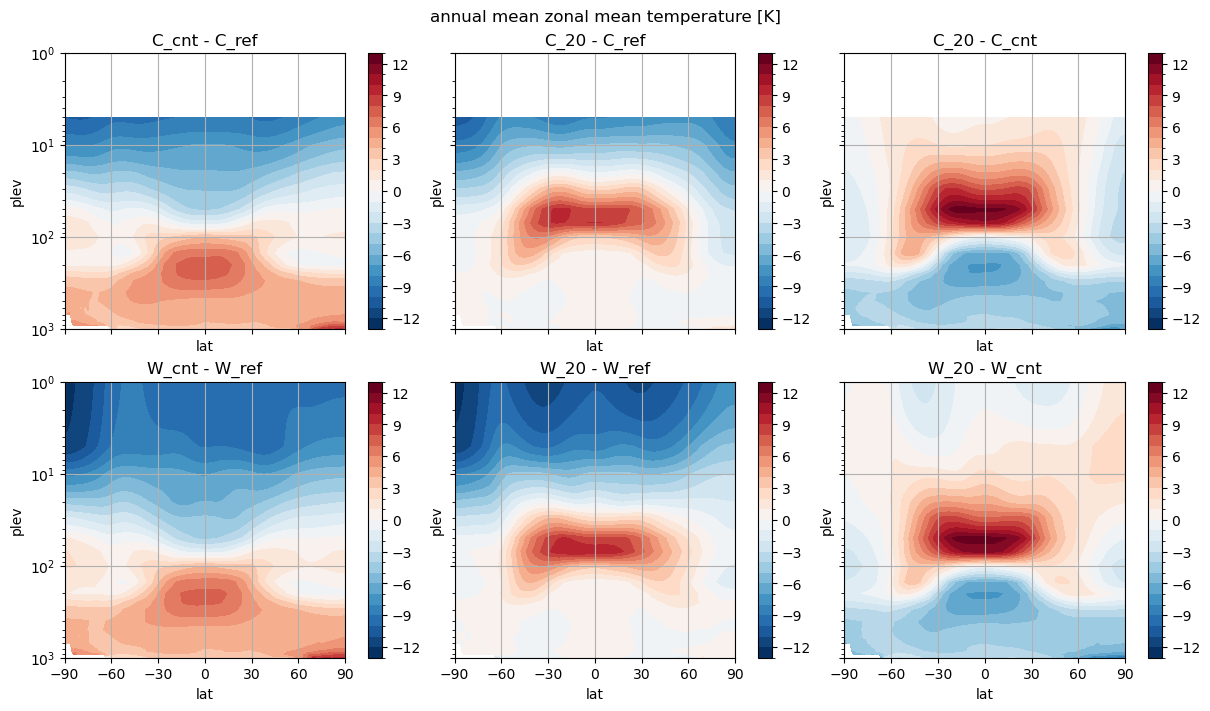

In [16]:
var = t

fig, axs = plt.subplots(2,3, figsize=(12,7), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("annual mean zonal mean temperature [K]")

for exp,ax in zip(exps_diff,axs.flat):
    (var[exp[0]]-var[exp[1]]).plot.contourf(ax=ax, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), levels=range(-13,14), cmap='RdBu_r')
    ax.set_title(f'{exp[0]} - {exp[1]}')
    ax.grid()

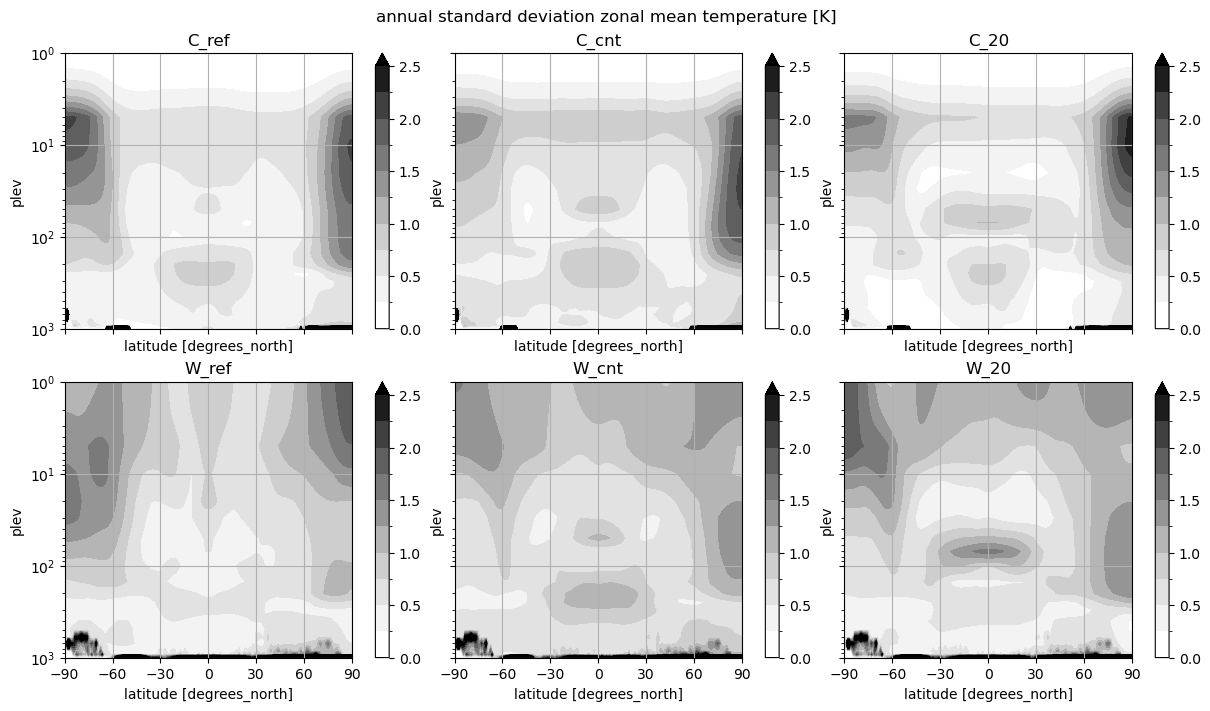

In [17]:
var = t_std

fig, axs = plt.subplots(2,3, figsize=(12,7), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("annual standard deviation zonal mean temperature [K]")

for exp,ax in zip(exps,axs.flat):
    (var[exp]).plot.contourf(ax=ax, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), levels=np.arange(0,2.51,0.25), cbar_kwargs={'label':''}, cmap='Greys')
    ax.set_title(exp)
    ax.grid()

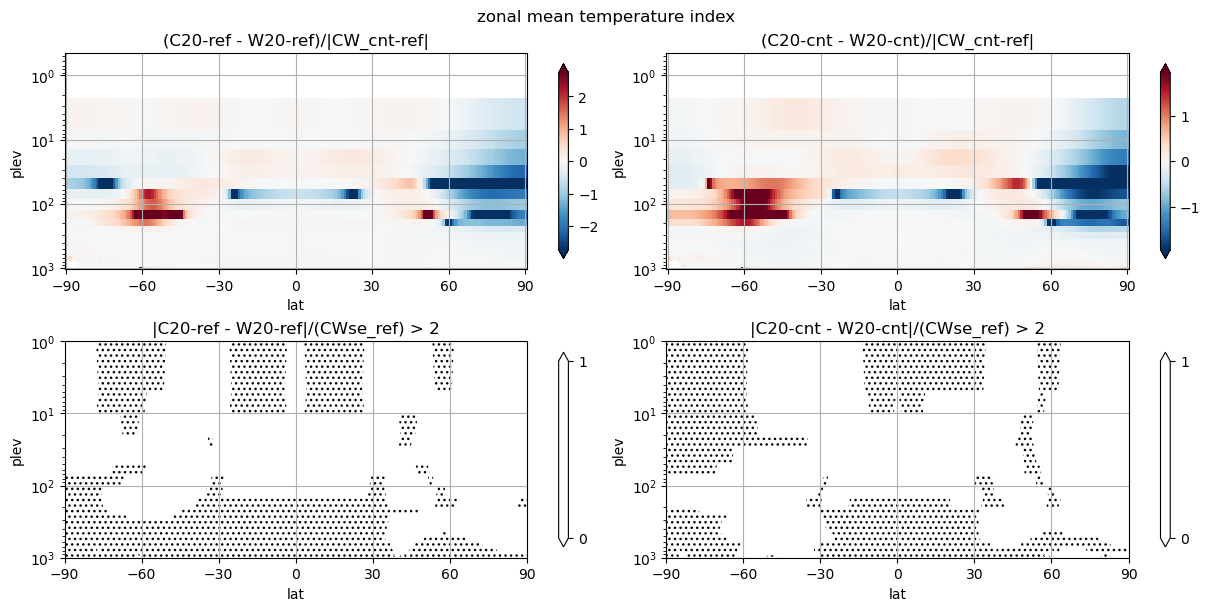

In [18]:
var = t
std = t_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

fig, axs = plt.subplots(2,2,layout='constrained', figsize=(12,6))
fig.suptitle("zonal mean temperature index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(np.abs(CWmean_cnt-CWmean_ref))).plot(ax=ax, robust=True, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/|CW_cnt-ref|")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(np.abs(CWmean_cnt-CWmean_ref))).plot(ax=ax, robust=True, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/|CW_cnt-ref|")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.grid()

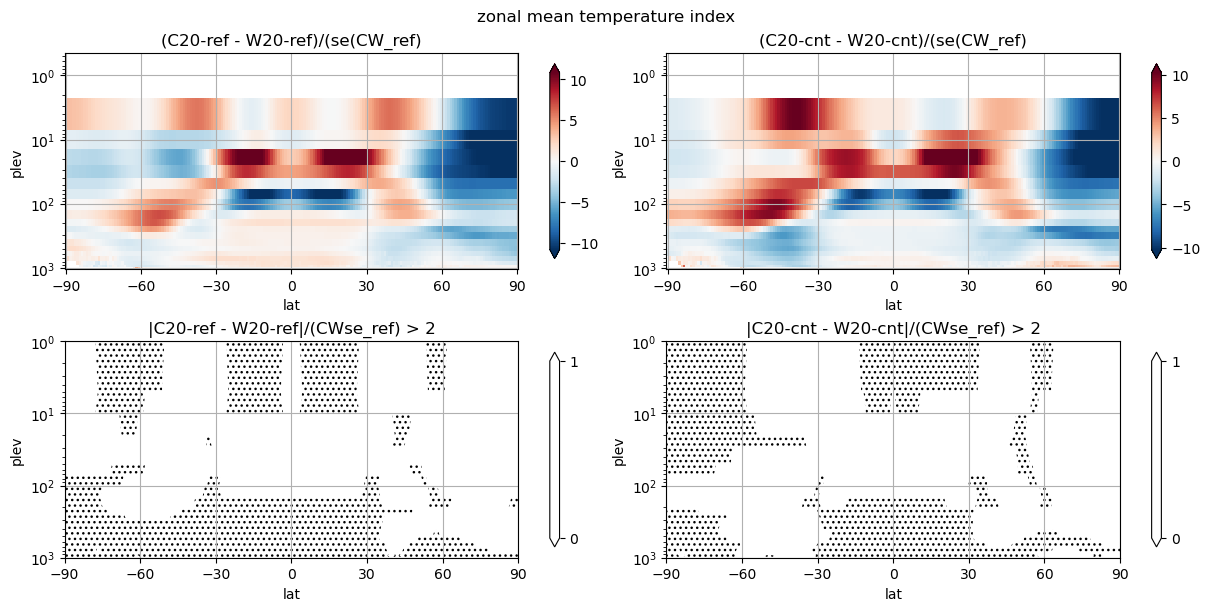

In [19]:
var = t
std = t_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

fig, axs = plt.subplots(2,2,layout='constrained', figsize=(12,6))
fig.suptitle("zonal mean temperature index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref)).plot(ax=ax, robust=True, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/(se(CW_ref)")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref)).plot(ax=ax, robust=True, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/(se(CW_ref)")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.grid()

## zonal mean zonal wind

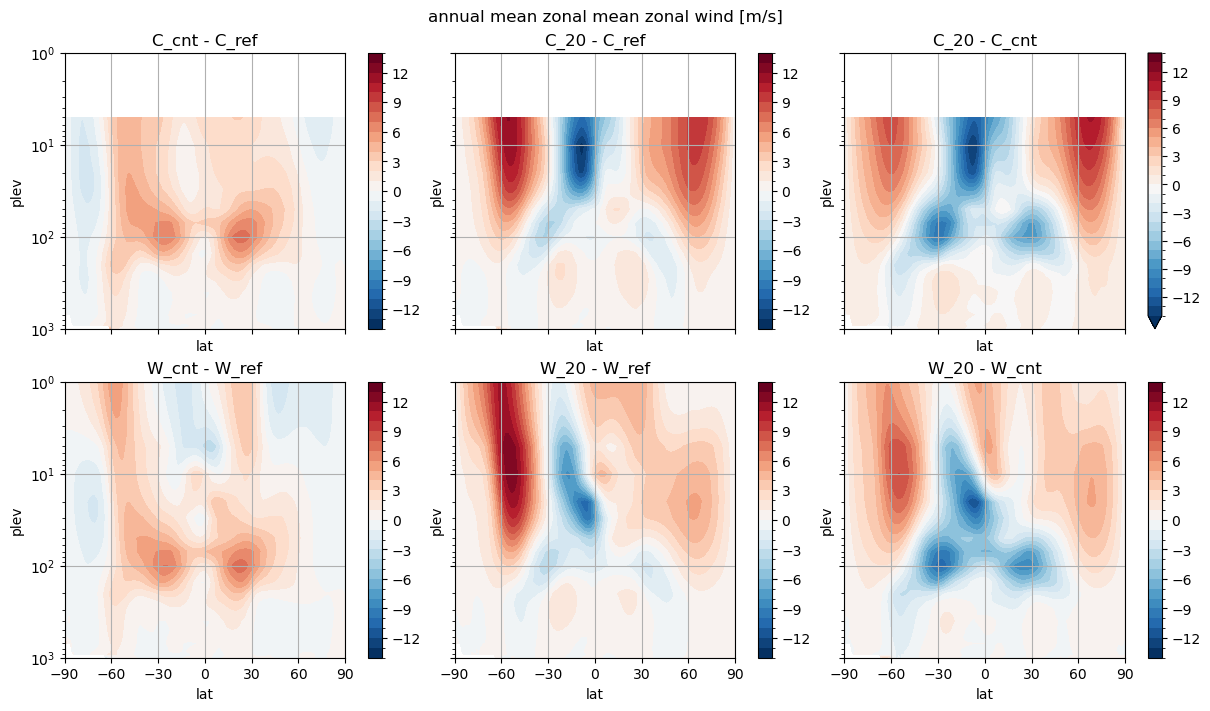

In [20]:
var = u

fig, axs = plt.subplots(2,3, figsize=(12,7), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("annual mean zonal mean zonal wind [m/s]")

for exp,ax in zip(exps_diff,axs.flat):
    (var[exp[0]]-var[exp[1]]).plot.contourf(ax=ax, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), levels=range(-14,15), cmap='RdBu_r')
    ax.set_title(f'{exp[0]} - {exp[1]}')
    ax.grid()

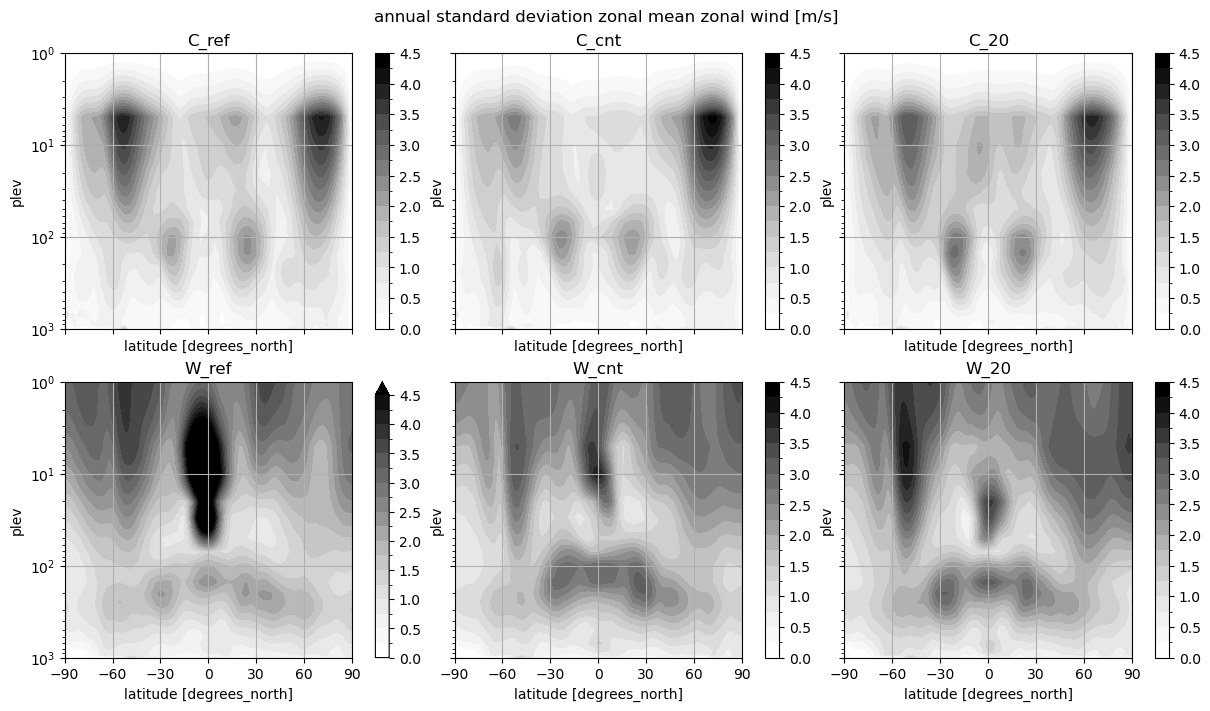

In [21]:
var = u_std

fig, axs = plt.subplots(2,3, figsize=(12,7), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("annual standard deviation zonal mean zonal wind [m/s]")

for exp,ax in zip(exps,axs.flat):
    (var[exp]).plot.contourf(ax=ax, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), levels=np.arange(0,4.6,0.25), robust=True, cbar_kwargs={'label':''}, cmap='Greys')
    ax.set_title(exp)
    ax.grid()

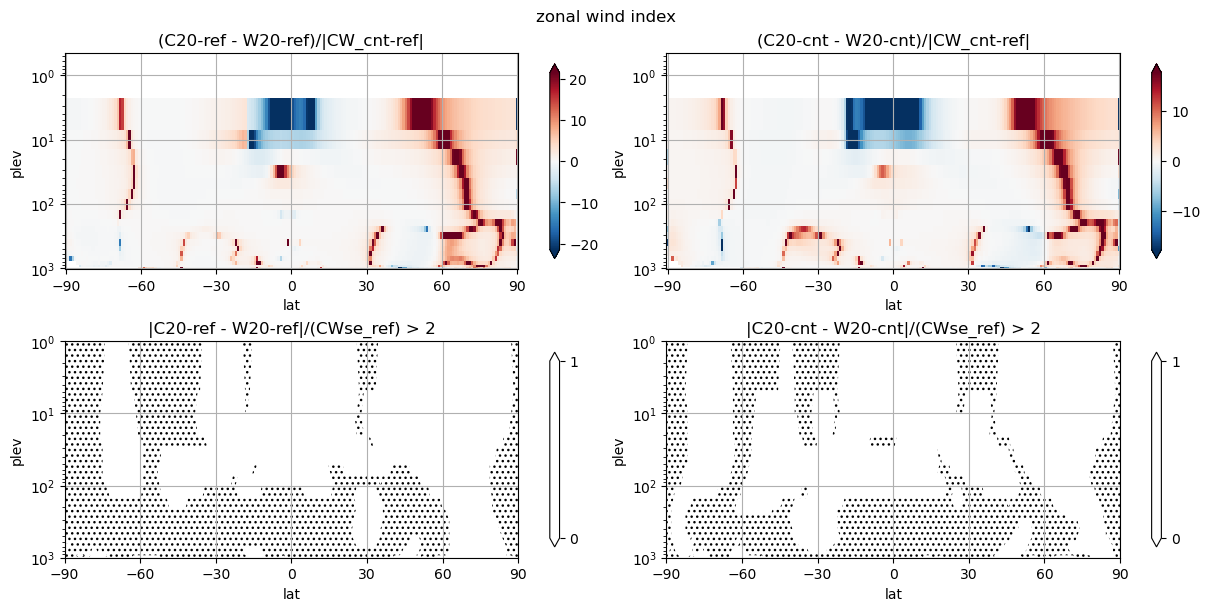

In [22]:
var = u
std = u_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

fig, axs = plt.subplots(2,2,layout='constrained', figsize=(12,6))
fig.suptitle("zonal wind index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(np.abs(CWmean_cnt-CWmean_ref))).plot(ax=ax, robust=True, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/|CW_cnt-ref|")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(np.abs(CWmean_cnt-CWmean_ref))).plot(ax=ax, robust=True, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/|CW_cnt-ref|")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.grid()

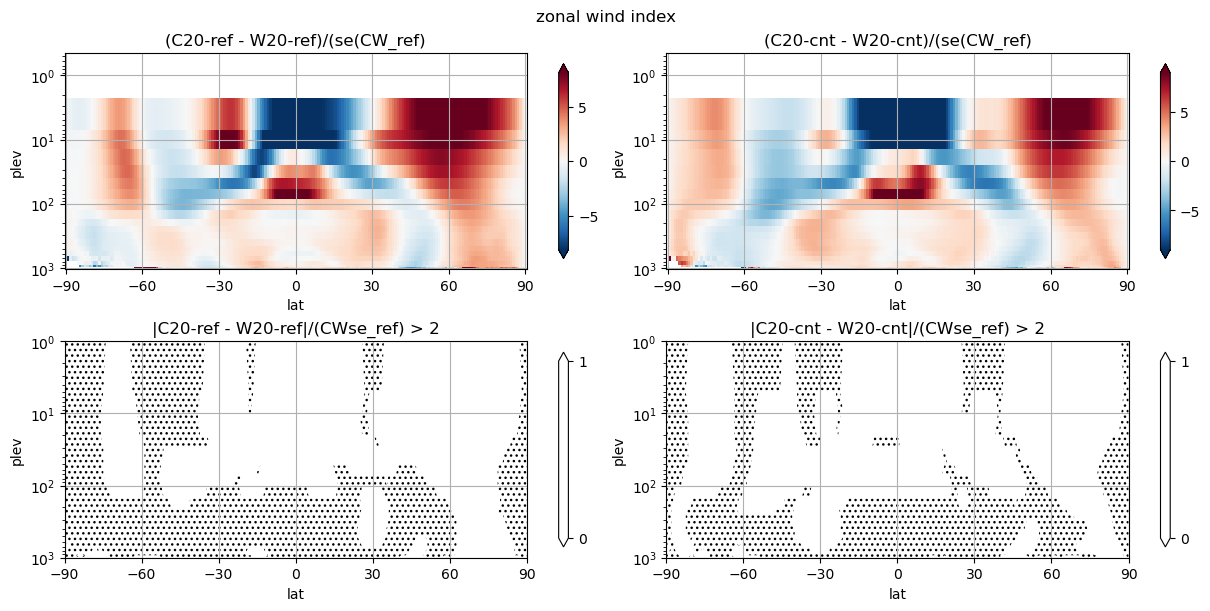

In [23]:
var = u
std = u_std

CWmean_ref = (var['C_ref'] + var['W_ref'])/2
CWmean_cnt = (var['C_cnt'] + var['W_cnt'])/2
CWmean_20 = (var['C_20'] + var['W_20'])/2

CWmeanse_ref = (std['C_ref']/np.sqrt(std['C_ref'].N) + std['W_ref']/np.sqrt(std['W_ref'].N))/2
se_20ref = ((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref))
se_20cnt = ((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref))

fig, axs = plt.subplots(2,2,layout='constrained', figsize=(12,6))
fig.suptitle("zonal wind index")

ax = axs.flat[0]
((var['C_20']-var['C_ref']-var['W_20']+var['W_ref'])/(CWmeanse_ref)).plot(ax=ax, robust=True, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
#(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-ref - W20-ref)/(se(CW_ref)")

ax = axs.flat[1]
((var['C_20']-var['C_cnt']-var['W_20']+var['W_cnt'])/(CWmeanse_ref)).plot(ax=ax, robust=True, y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
#(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title("(C20-cnt - W20-cnt)/(se(CW_ref)")

ax = axs.flat[2]
(np.abs(se_20ref)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-ref - W20-ref|/(CWse_ref) > 2")

ax = axs.flat[3]
(np.abs(se_20cnt)>2).astype('int').plot.contourf(ax=ax, hatches=['...',''], alpha=0, levels=[0,1], extend='both', y='plev', yincrease=False, yscale='log', xticks=range(-90,91,30), cbar_kwargs={'shrink':0.9})
ax.set_title("|C20-cnt - W20-cnt|/(CWse_ref) > 2")

for ax in axs.flat:
    ax.grid()

In [11]:
ds_Cref = xr.open_dataset("/home/jasperdj/kerchunk/b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.2015-01_2130-12.json")
ds_Cref = ds_Cref.sel(time=slice('2016','2035')).mean('time', keep_attrs=True)

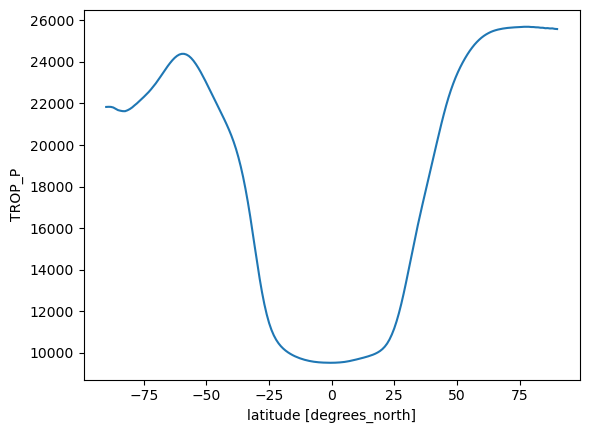

In [12]:
ds_Cref.TROP_P.mean('lon').plot()

In [14]:
ds_Cref.TROP_P.mean('lon').to_netcdf("figdata/TROP_P_Cref.nc")

## paper plot

In [15]:
# create custom colormap
colors = plt.cm.RdBu_r(np.linspace(0,1,26))
colors[12] = [1,1,1,1]
colors[13] = [1,1,1,1]
mycmap = mcolors.ListedColormap(colors[1:-1])
mycmap.set_under(colors[0])
mycmap.set_over(colors[-1])

In [18]:
TROP_P = xr.open_dataset("figdata/TROP_P_Cref.nc").TROP_P

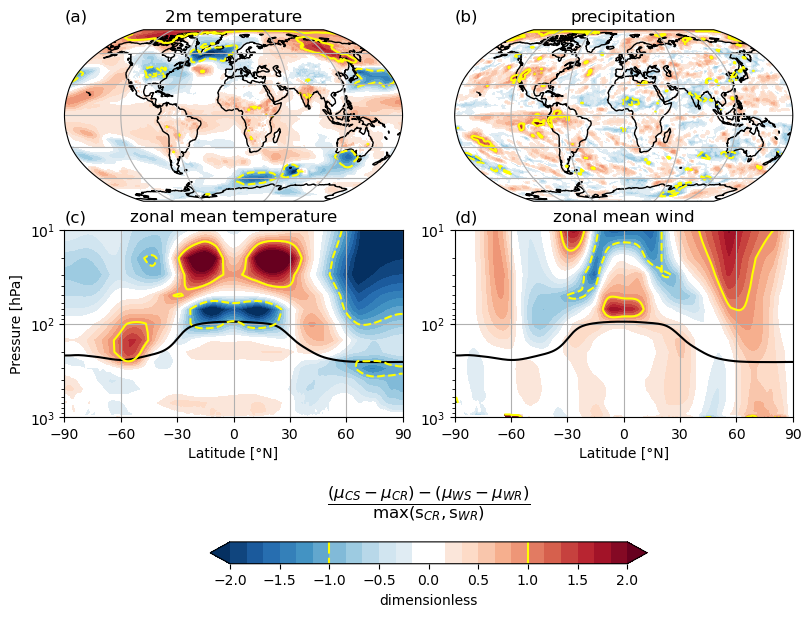

In [43]:
def index1(var, var_std):
    data = (var['C_20']-var['C_ref']) - (var['W_20']-var['W_ref'])
    std = (var_std['C_ref'] + var_std['W_ref'])/2
    label = r"$\dfrac{(CS-CR)-(WS-WR)}{(\mathrm{s}_{CR}+\mathrm{s}_{WR})/2}$"
    return data/std, label

def index2(var, var_std):
    data = (var['C_20']-var['C_ref']) - (var['W_20']-var['W_ref'])
    std = xr.ufuncs.maximum(var_std['W_ref'], var_std['C_ref'])
    label = r"$\dfrac{(\mu_{CS}-\mu_{CR})-(\mu_{WS}-\mu_{WR})}{\mathrm{max}(\mathrm{s}_{CR},\mathrm{s}_{WR})}$"
    return data/std, label

def index3(var, var_std):
    data = (var['C_20']-var['C_cnt']) - (var['W_20']-var['W_cnt'])
    std = (var_std['C_ref'] + var_std['W_ref'])/2
    label = r"$\dfrac{(CS-CC)-(WS-WC)}{(\mathrm{s}_{CR}+\mathrm{s}_{WR})/2}$"
    return data/std, label

def index4(var, var_std):
    data = (var['C_20']-var['C_ref']) - (var['W_20']-var['W_ref'])
    std = np.sqrt(var_std['C_ref']**2 + var_std['W_ref']**2)
    label = r"$\dfrac{(\mu_{CS}-\mu_{CR})-(\mu_{WS}-\mu_{WR})}{\sqrt{\mathrm{s}_{CR}^2+\mathrm{s}^2_{WR}}}$"
    return data/std, label

index = index2

fig = plt.figure(figsize=(8,6), layout='constrained')

cfargs = dict(levels=np.arange(-2,2.01, 1/6), extend='both', cmap=mycmap)
csargs = dict(levels=[-1,1], colors='yellow')

ax = fig.add_subplot(221, projection=ccrs.Robinson())
idx,label = index(trefht, trefht_std)
idx, x, y = add_cyclic(idx, idx.lon, idx.lat)
cf = ax.contourf(x, y, idx,transform=ccrs.PlateCarree(), **cfargs)
cs = ax.contour(x, y, idx, transform=ccrs.PlateCarree(), **csargs)
ax.coastlines()
ax.gridlines()
ax.set_title("2m temperature")
ax.set_title("(a)", loc='left')

ax = fig.add_subplot(222, projection=ccrs.Robinson())
idx,_ = index(prect, prect_std)
idx, x, y = add_cyclic(idx, idx.lon, idx.lat)
cf = ax.contourf(x, y, idx, transform=ccrs.PlateCarree(), **cfargs)
cs = ax.contour(x, y, idx, transform=ccrs.PlateCarree(), **csargs)
ax.coastlines()
ax.gridlines()
ax.set_title("precipitation")
ax.set_title("(b)", loc='left')

ax = fig.add_subplot(223, projection=None)
idx,_ = index(t, t_std)
cf = ax.contourf(idx.lat, idx.plev, idx.T, **cfargs)
cs_trop = ax.plot(TROP_P.lat, TROP_P/100, ls='-', c='k')
cs = ax.contour(idx.lat, idx.plev, idx.T, **csargs)
ax.set_title("zonal mean temperature")
ax.set_title("(c)", loc='left')
ax.set_yscale('log')
ax.invert_yaxis()
ax.set_ylim([1000,10])
ax.set_ylabel('Pressure [hPa]')
ax.set_xticks(range(-90,91,30))
ax.set_xlabel('Latitude [°N]')
ax.grid(zorder=1)

ax = fig.add_subplot(224, projection=None, sharex=ax, sharey=ax)
idx,_ = index(u, u_std)
cf = ax.contourf(idx.lat, idx.plev, idx.T, **cfargs)
cs_trop = ax.plot(TROP_P.lat, TROP_P/100, ls='-', c='k')
cs = ax.contour(idx.lat, idx.plev, idx.T, **csargs)
ax.set_title("zonal mean wind")
ax.set_title("(d)", loc='left')
ax.set_xlabel('Latitude [°N]')
ax.grid()

cb = fig.colorbar( cf, ax=fig.get_axes(), shrink=0.6, orientation='horizontal')
ls = cb.add_lines(cs)
cb.lines[0].set_ls([(2.5, [5.5, 2]), (0.0, None)]) # values taken from cs.get_ls() and add offset
cb.ax.set_title(label, pad=25)
cb.ax.set_xlabel('dimensionless')

fig.savefig(f"{savepath}/indexmax.pdf", bbox_inches='tight')